In [7]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

# 실습 1. Determinant

In [2]:
import numpy as np

# 아래의 함수를 완성하시오.
def determinant(matrix):
  if len(matrix) <= 2:
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
  else :
    ret = 0
    for i in range(len(matrix)):
      det_matrix = np.array(matrix)
      det_matrix = np.delete(det_matrix, i, axis = 0)
      det_matrix = np.delete(det_matrix, 0, axis = 1)
      ret += matrix[i][0] * (np.power(-1, i)) * determinant(det_matrix)
    return ret

# def determinant(matrix):
#   return np.linalg.det(matrix)

# 교재에 있는 matrix
matrix_1 = [
    [8, 1, 6],
    [3, 5, 7],
    [4, 9, 2]
]
# test할 matrix
matrix_2 = [
    [8, 1, 6, 1],
    [3, 5, 7, 2],
    [4, 9, 2, 5],
    [3, 5, 7, 1]
]
# Own test
matrix_3 = [
    [8, 1, 6, 1, 3],
    [3, 5, 7, 2, 4],
    [4, 9, 2, 5, 6],
    [3, 5, 7, 1, 5],
    [3, 4, 6, 7, 9]
]

det = determinant(matrix_2)
# det = determinant(matrix_3)
print("Determinant of the matrix:", det)

Determinant of the matrix: 360


# 실습 2. transformation

shape of gray_cat:  (640, 427)
[[19 19 20 ... 19 19 19]
 [19 19 20 ... 19 19 19]
 [19 19 20 ... 19 19 19]
 ...
 [26 26 26 ... 26 25 25]
 [26 26 26 ... 26 26 25]
 [25 25 24 ... 27 27 26]]


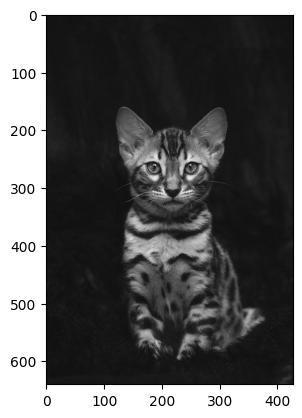

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

gray_cat = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
# gray_cat = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cat.jpg', cv2.IMREAD_GRAYSCALE) # colab
print('shape of gray_cat: ', gray_cat.shape)
print(gray_cat)
plt.imshow(gray_cat, cmap='gray')
plt.show()

In [5]:
# 아래의 함수를 완성하시오.
def rotate_image(image, theta): # 640, 427
    cat = [[0]*len(image[0]) for _ in range(len(image))]    
    for x in range(len(image)):
      for y in range(len(image[0])):
        rotate_x = round((x - 320) * np.cos(theta) - (y - 213) * np.sin(theta)) + 320
        rotate_y = round((x - 320) * np.sin(theta) + (y - 213) * np.cos(theta)) + 213
        if rotate_x < len(image) and rotate_y < len(image[0]):
          cat[rotate_x][rotate_y] = image[x][y]

    return cat

In [18]:

# def rotate_image(image, theta):
#   cat = np.array(image)
#   np_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
#   for x in range(len(image)):
#     for y in range(len(image[0])):
#       print(np_matrix)
#       rotate_v = np.matmul(np_matrix, [x-320, y-213])
#       print(rotate_v[0])
#       rotate_v[0] += 320
#       rotate_v[1] += 213
#       if rotate_v[0] < len(image) and rotate_v[1] < len(image[0]):
#           cat[rotate_v[0]][rotate_v[1]] = image[x][y]

#   return cat

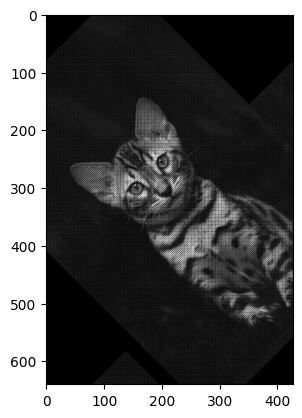

In [6]:
angle = 45

rotated_img = rotate_image(gray_cat, np.radians(angle))
plt.imshow(rotated_img, cmap='gray')
plt.show()

# 심화 문제. composite_transformation

In [7]:
# 아래의 함수를 완성하시오.
def composite_transformation(image, theta, translation) :
  cat = [[0]*len(image[0]) for _ in range(len(image))]
  for x in range(len(image)):
    for y in range(len(image[0])):
      rotate_x = int((x - 320) * np.cos(theta) - (y - 213) * np.sin(theta)) + 320 - translation[0]
      rotate_y = int((x - 320) * np.sin(theta) + (y - 213) * np.cos(theta)) + 213 + translation[1]
      if rotate_x < len(image) and rotate_y < len(image[0]):
        cat[rotate_x][rotate_y] = image[x][y]
  return cat

In [ ]:
# def composite_transformation(image, theta, translation) :
#   cat = [[0]*len(image[0]) for _ in range(len(image))]

#   return cat

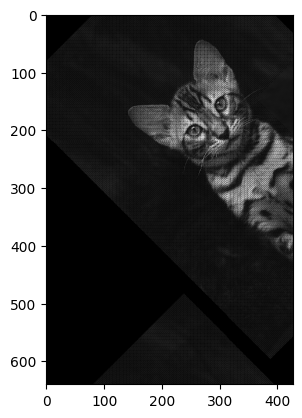

In [8]:
angle = 45
t1, t2 = 100, 100 # 우상단으로 이동

new_image = composite_transformation(gray_cat, np.radians(angle), (t1, t2))
plt.imshow(new_image, cmap='gray')
plt.show()